In [15]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Ex 4/ 7.3

In [27]:
def test_reg_lin(d):
    #X = np.random.rand(100,d)
    #col1 = np.ones((100,1))
    #X = np.concatenate(   (col1, X), axis=1)
    #Y = np.random.rand(100,1 )
    debut = time.time()
    B = np.random.rand(d,d)
    #a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    a = np.linalg.inv(B)
    duree = time.time() - debut
    return duree

In [28]:
durees = []
dimensions = range(250,10000,250)
for d in dimensions:
    durees.append( test_reg_lin(d) )
    print(d, end=' ')
print(durees)

250 500 750 1000 1250 1500 1750 2000 2250 2500 2750 3000 3250 3500 3750 4000 4250 4500 4750 5000 5250 5500 5750 6000 6250 6500 6750 7000 7250 7500 7750 8000 8250 8500 8750 9000 9250 9500 9750 [0.0065555572509765625, 0.013846158981323242, 0.038344621658325195, 0.06479501724243164, 0.1308751106262207, 0.19997525215148926, 0.33191490173339844, 0.4930264949798584, 0.6644327640533447, 0.8739867210388184, 1.0824716091156006, 1.3703782558441162, 1.7104096412658691, 4.257003307342529, 2.6275784969329834, 3.1365606784820557, 3.6901164054870605, 4.368844032287598, 5.055240154266357, 5.93859076499939, 6.801930904388428, 7.8138885498046875, 8.773176431655884, 10.001502990722656, 11.32028341293335, 12.703704118728638, 13.969391345977783, 15.541263341903687, 17.349486112594604, 18.90211033821106, 20.622089385986328, 23.02325129508972, 25.782910108566284, 27.885387897491455, 29.64143443107605, 32.43167543411255, 35.24564528465271, 38.40102744102478, 40.72420692443848]


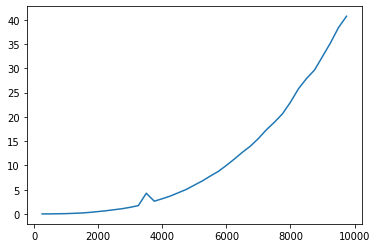

In [29]:
plt.plot(dimensions, durees)
plt.show()

In [30]:
#approximation de cette courbe avec une droite
dimensions2D = np.array(dimensions).reshape(-1,1)
durees2D = np.array(durees).reshape(-1,1)
linreg = LinearRegression()


In [31]:
linreg.fit(dimensions2D,durees2D)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(linreg.coef_, linreg.intercept_ )

[[0.00397034]] [-8.74939676]


In [33]:
mean_squared_error(   linreg.predict(dimensions2D)   , durees2D)

21.387456382931834

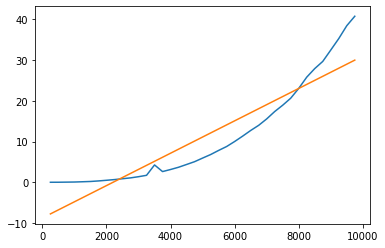

In [34]:
plt.plot(dimensions, durees)
plt.plot(dimensions, linreg.predict(dimensions2D))
plt.show()

In [35]:
#on ajoute à dimensions2D une nouvelle colonne qui contient les carrés des valeurs et cubes
dimensions2D_cub = np.concatenate( (dimensions2D, dimensions2D**2, dimensions2D**3), axis=1) 
linreg.fit(dimensions2D_cub,durees2D)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print(10000000000*linreg.coef_, 10000000000*linreg.intercept_ )
mean_squared_error(   linreg.predict(dimensions2D_cub)   , durees2D)

[[ 2.32400596e+06 -2.09061762e+02  4.42302678e-01]] [-1.52679089e+09]


0.1328781967664061

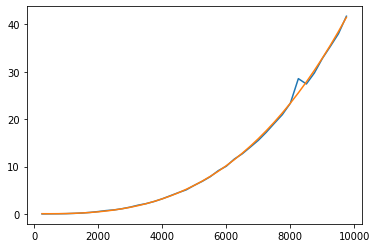

In [26]:
plt.plot(dimensions, durees)
plt.plot(dimensions, linreg.predict(dimensions2D_cub))
plt.show()

In [58]:
#SKLEARN ira beaucoup plus vite
linreg = LinearRegression()
#generer donnees avec d = 50000
d = 100000
X = np.random.rand(100,d)
Y = np.random.rand(100,1)

In [59]:
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]


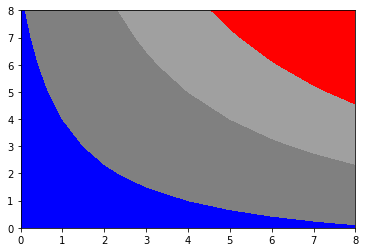

In [83]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y
print(h)

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()